In [1]:
# 1- In this lab, you will use learningSet.csv file which you already have cloned in today's activities.

In [21]:
import numpy as np
import pandas as pd

In [22]:
root = pd.read_csv(r'C:\Users\aidag\OneDrive\Escritorio\ironhack\learningSet.csv')
df_original = root
df_original.head(5)

C:\Users\aidag\AppData\Local\Temp\ipykernel_11020\4160397925.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  root = pd.read_csv(r'C:\Users\aidag\OneDrive\Escritorio\ironhack\learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [23]:
df_copy = df_original.copy()

In [5]:
# 2- Check for null values in all the columns

In [24]:
df_copy.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [26]:
total_nans = df_copy.isna().sum().sum()
total_nans

5158796

In [9]:
# 3- Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. 
     # We will append this list and then drop all the columns in this list later:

# OSOURCE - symbol definitions not provided, too many categories
# ZIP CODE - we are including state already

In [27]:
drop_list = []

In [28]:
drop_list.append('OSOURCE')
drop_list.append('ZIP CODE')

In [29]:
def deletecolumns(df, columns):
    for column in columns:
        if column in df.columns:
            df.drop(column, axis=1, inplace=True)
    return df

df_copy = deletecolumns(df_copy, drop_list)

df_copy.columns

Index(['ODATEDW', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'DOB',
       'NOEXCH', 'RECINHSE', 'RECP3',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=480)

In [13]:
# 4- Identify columns that over 85% missing values

In [30]:
missing_percentage = df_copy.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 85].index.tolist()

print("The columns that are over 85% missing values are:", columns_to_drop)

The columns that are over 85% missing values are: ['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


In [15]:
# 5- Remove those columns from the dataframe

In [31]:
df_copy = df_copy.drop(columns=columns_to_drop)

df_copy.head(5)

,ODATEDW,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,0,IL,61081,,,3712,0,,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,91326,,,5202,0,,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,27017,,,0,0,,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,0,CA,95953,,,2801,0,,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,0,FL,33176,,,2001,0,X,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [17]:
# 6- Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females,
    # and "other" for all the rest
    # Note that there are a few null values in the column. We will first replace those null values using the code below:

In [32]:
df_copy['GENDER'].value_counts()

GENDER
F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: count, dtype: int64

In [33]:
df_copy['GENDER'] = df_copy['GENDER'].fillna('F')

In [34]:
def reduce_categories(gender):
    if gender == 'M':
        return 'M'
    elif gender == 'F':
        return 'F'
    else:
        return 'OTHER'

df_copy['GENDER'] = df_copy['GENDER'].apply(reduce_categories)

In [35]:
df_copy['GENDER'].value_counts()

GENDER
F        51277
M        39094
OTHER     5041
Name: count, dtype: int64

In [22]:
# Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons

In [23]:
# 7- Check for null values in the numerical columns

In [36]:
numerical_data = df_copy.select_dtypes(include=['int64', 'int32', 'float32', 'float64'])

In [37]:
numerical_data.isnull().sum().sum

<bound method Series.sum of ODATEDW         0
TCODE           0
DOB             0
AGE         23665
INCOME      21286
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 382, dtype: int64>

In [25]:
# 8- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [38]:
cols = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
cleaned_numerical_data = df_copy[cols].dropna()

In [26]:
# 9- Use appropriate EDA technique where ever necessary.

In [39]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [42]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
ODATEDW,95412.0,9141.363256,343.454752,8306.0,8801.0,9201.0,9501.0,9701.0
TCODE,95412.0,54.223117,953.844476,0.0,0.0,1.0,2.0,72002.0
DOB,95412.0,2723.602933,2132.241295,0.0,201.0,2610.0,4601.0,9710.0
AGE,71747.0,61.611649,16.664199,1.0,48.0,62.0,75.0,98.0
INCOME,74126.0,3.886248,1.854960,1.0,2.0,4.0,5.0,7.0
...,...,...,...,...,...,...,...,...
TARGET_B,95412.0,0.050759,0.219506,0.0,0.0,0.0,0.0,1.0
TARGET_D,95412.0,0.793073,4.429725,0.0,0.0,0.0,0.0,200.0
HPHONE_D,95412.0,0.500618,0.500002,0.0,0.0,1.0,1.0,1.0
RFA_2F,95412.0,1.910053,1.072749,1.0,1.0,2.0,3.0,4.0


In [43]:
summary = df_copy.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(lambda x: round(x, 2))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
ODATEDW,95412.0,9141.36,343.45,8306.0,8801.0,9201.0,9501.0,9701.0,700.0
TCODE,95412.0,54.22,953.84,0.0,0.0,1.0,2.0,72002.0,2.0
DOB,95412.0,2723.60,2132.24,0.0,201.0,2610.0,4601.0,9710.0,4400.0
AGE,71747.0,61.61,16.66,1.0,48.0,62.0,75.0,98.0,27.0
INCOME,74126.0,3.89,1.85,1.0,2.0,4.0,5.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...
TARGET_B,95412.0,0.05,0.22,0.0,0.0,0.0,0.0,1.0,0.0
TARGET_D,95412.0,0.79,4.43,0.0,0.0,0.0,0.0,200.0,0.0
HPHONE_D,95412.0,0.50,0.50,0.0,0.0,1.0,1.0,1.0,1.0
RFA_2F,95412.0,1.91,1.07,1.0,1.0,2.0,3.0,4.0,2.0


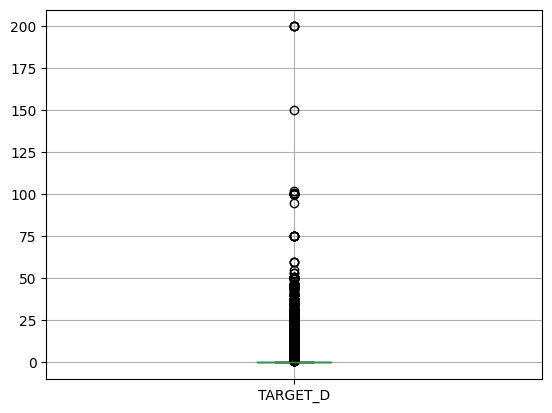

In [44]:
df_copy[['TARGET_D']].boxplot()
plt.show()

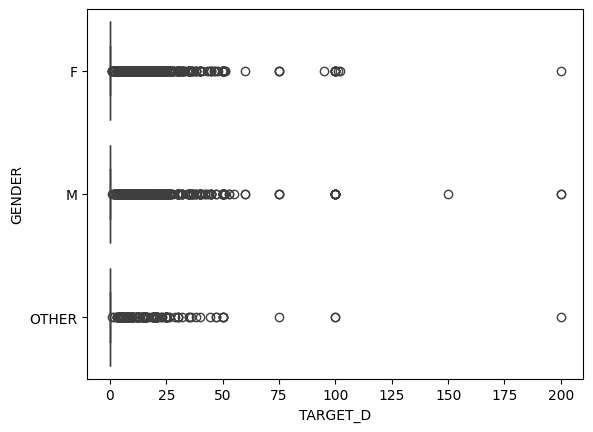

In [45]:
sns.boxplot(x="TARGET_D", y="GENDER", data=df_copy) 
plt.show()

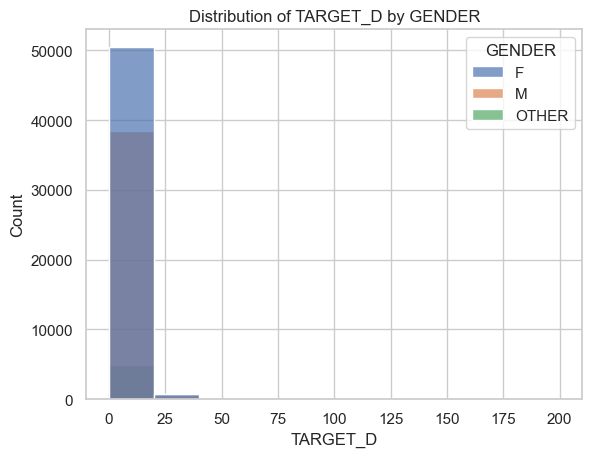

In [49]:
sns.set(style="whitegrid")

sns.histplot(data=df_copy, x='TARGET_D', bins=10, hue='GENDER', color='red', alpha=0.7)

plt.xlabel('TARGET_D')
plt.ylabel('Count')
plt.title('Distribution of TARGET_D by GENDER')

plt.show()

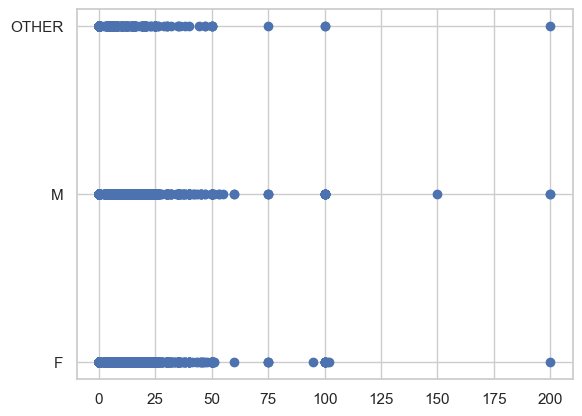

In [50]:
plt.scatter(df_copy['TARGET_D'], df_copy['GENDER'])
plt.show()